In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading ratings file
ratings = pd.read_csv(r'D:\ml\movierating/ratings.csv', sep='\t')
# Reading users file
users = pd.read_csv(r'D:\ml\movierating/users.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])

# Reading movies file
movies = pd.read_csv(r'D:\ml\movierating/movies.csv', sep='\t', encoding='latin-1', usecols=['movie_id', 'title', 'genres'])

In [3]:
ratings.head()

,Unnamed: 0,user_id,movie_id,rating,timestamp,user_emb_id,movie_emb_id
0,0,1,1193,5,978300760,0,1192
1,1,1,661,3,978302109,0,660
2,2,1,914,3,978301968,0,913
3,3,1,3408,4,978300275,0,3407
4,4,1,2355,5,978824291,0,2354


In [4]:
# Reading ratings file
# Ignore the timestamp column,user_emb_id,movie_emb_id and Unnamed
ratings = pd.read_csv(r'D:\ml\movierating/ratings.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'movie_id', 'rating'])

In [5]:
ratings.head()

,user_id,movie_id,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 3 columns):
user_id     1000209 non-null int64
movie_id    1000209 non-null int64
rating      1000209 non-null int64
dtypes: int64(3)
memory usage: 22.9 MB


In [7]:
users.head()

,user_id,gender,zipcode,age_desc,occ_desc
0,1,F,48067,Under 18,K-12 student
1,2,M,70072,56+,self-employed
2,3,M,55117,25-34,scientist
3,4,M,02460,45-49,executive/managerial
4,5,M,55455,25-34,writer


In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
user_id     6040 non-null int64
gender      6040 non-null object
zipcode     6040 non-null object
age_desc    6040 non-null object
occ_desc    6040 non-null object
dtypes: int64(1), object(4)
memory usage: 236.0+ KB


In [9]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
movie_id    3883 non-null int64
title       3883 non-null object
genres      3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [11]:
# Data Exploration

In [12]:
# Titles
# Are there certain words that feature more often in Movie Titles? I'll attempt to figure this out using a word-cloud visualization.

In [13]:
# Import new libraries
%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS


In [14]:
# Create a wordcloud of the movie titles
movies['title'] = movies['title'].fillna("").astype('str')
title_corpus = ' '.join(movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

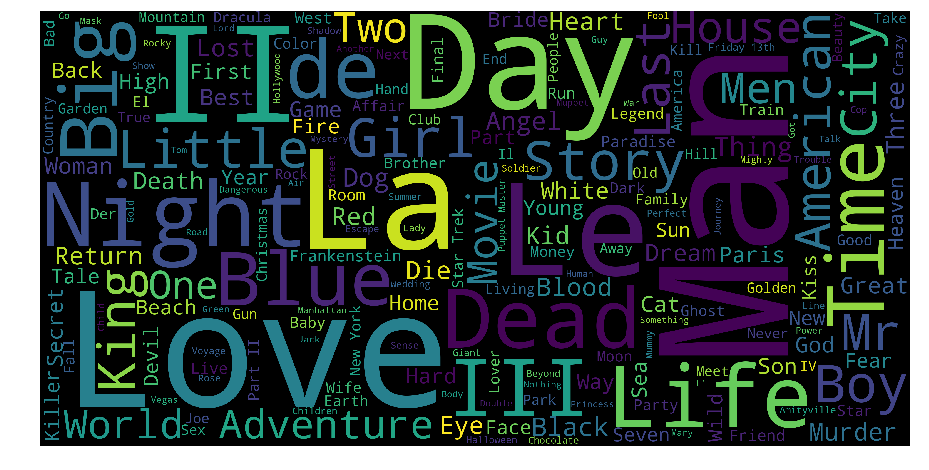

In [15]:
# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [16]:
# rating
ratings['rating'].describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

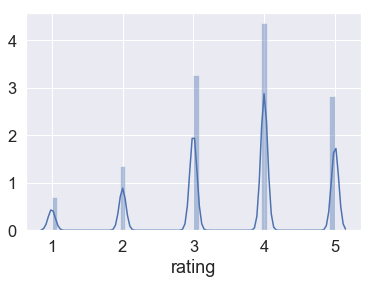

In [17]:
# Import seaborn library
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%matplotlib inline

# Display distribution of rating
sns.distplot(ratings['rating'].fillna(ratings['rating'].median()))

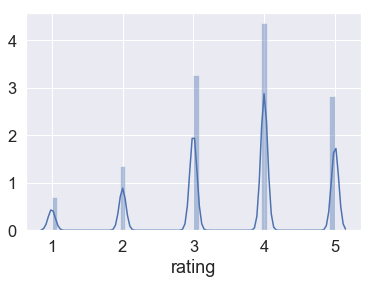

In [18]:
# Import seaborn library
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=1.5)
%matplotlib inline

# Display distribution of rating
sns.distplot(ratings['rating'].fillna(ratings['rating'].mean()))

In [19]:
# Join all 3 files into one dataframe
dataset = pd.merge(pd.merge(movies, ratings),users)
# Display 20 movies with highest ratings
dataset[['title','genres','rating']].sort_values('rating', ascending=False).head(20)

,title,genres,rating
0,Toy Story (1995),Animation|Children's|Comedy,5
489283,American Beauty (1999),Comedy|Drama,5
489259,Election (1999),Comedy,5
489257,"Matrix, The (1999)",Action|Sci-Fi|Thriller,5
489256,Dead Ringers (1988),Drama|Thriller,5
489237,Rushmore (1998),Comedy,5
489236,"Simple Plan, A (1998)",Crime|Thriller,5
489226,Hands on a Hard Body (1996),Documentary,5
489224,Pleasantville (1998),Comedy,5
489212,Say Anything... (1989),Comedy|Drama|Romance,5


In [20]:
# genres
# The genres variable will surely be important while building the recommendation engines since it describes the content of the film (i.e. Animation, Horror, Sci-Fi). A basic assumption is that films in the same genre should have similar contents. I'll attempt to see exactly which genres are the most popular.

In [21]:
# Make a census of the genre keywords
genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))


In [22]:
# Function that counts the number of times each of the genre keywords appear
def count_word(dataset, ref_col, census):
    """dataset=>movies,ref_col=genres row in movie,census=genres label"""
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]:
            """2 for loop with if statement"""
            if pd.notnull(s): 
                keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences

# Calling this function gives access to a list of genre keywords which are sorted by decreasing frequency
keyword_occurences= count_word(movies, 'genres', genre_labels)
keyword_occurences


[['Drama', 1603],
 ['Comedy', 1200],
 ['Action', 503],
 ['Thriller', 492],
 ['Romance', 471],
 ['Horror', 343],
 ['Adventure', 283],
 ['Sci-Fi', 276],
 ["Children's", 251],
 ['Crime', 211],
 ['War', 143],
 ['Documentary', 127],
 ['Musical', 114],
 ['Mystery', 106],
 ['Animation', 105],
 ['Fantasy', 68],
 ['Western', 68],
 ['Film-Noir', 44]]

In [23]:
# Define the dictionary used to produce the genre wordcloud
genres = dict()
trunc_occurences = keyword_occurences[0:18]

In [24]:
for s in trunc_occurences:
    
    genres[s[0]] = s[1]

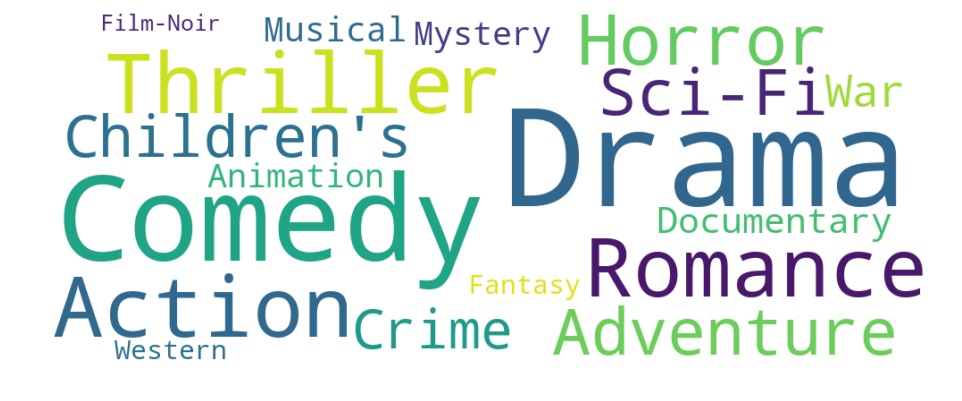

In [25]:
# Create the wordcloud
genre_wordcloud = WordCloud(width=1000,height=400, background_color='white')
genre_wordcloud.generate_from_frequencies(genres)

# Plot the wordcloud
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [30]:
# Content-Based Recommendation Model
# """With all that theory in mind, I am going to build a Content-Based Recommendation Engine that computes similarity between movies based on movie genres. It will suggest movies that are most similar to a particular movie based on its genre. To do so, I will make use of the file movies.csv."""

In [27]:
# Break up the big genre string into a string array
movies['genres'] = movies['genres'].str.split('|')
# Convert genres to string value
movies['genres'] = movies['genres'].fillna("").astype('str')

In [28]:
movies['genres']

0          ['Animation', "Children's", 'Comedy']
1         ['Adventure', "Children's", 'Fantasy']
2                          ['Comedy', 'Romance']
3                            ['Comedy', 'Drama']
4                                     ['Comedy']
5                ['Action', 'Crime', 'Thriller']
6                          ['Comedy', 'Romance']
7                    ['Adventure', "Children's"]
8                                     ['Action']
9            ['Action', 'Adventure', 'Thriller']
10                ['Comedy', 'Drama', 'Romance']
11                          ['Comedy', 'Horror']
12                   ['Animation', "Children's"]
13                                     ['Drama']
14            ['Action', 'Adventure', 'Romance']
15                         ['Drama', 'Thriller']
16                          ['Drama', 'Romance']
17                                  ['Thriller']
18                                    ['Comedy']
19                                    ['Action']
20                 [

In [31]:
#  do not have a quantitative metric to judge our machine's performance so this will have to be done qualitatively. In order to do so, I'll use TfidfVectorizer function from scikit-learn, which transforms text to feature vectors that can be used as input to estimator.
# to convert text into integer
# """convert text to word count vectors with CountVectorizer.
# to convert text to word frequency vectors with TfidfVectorizer.to convert text to unique integers with HashingVectorizer."""

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies['genres'])
tfidf_matrix.shape

(3883, 127)

In [ ]:
# I will be using the Cosine Similarity to calculate a numeric quantity that denotes the similarity between two movies. Since we have used the TF-IDF Vectorizer, calculating the Dot Product will directly give us the Cosine Similarity Score. Therefore, we will use sklearn's linear_kernel instead of cosine_similarities since it is much faster.

In [33]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim[:4, :4]

array([[1.        , 0.14193614, 0.09010857, 0.1056164 ],
       [0.14193614, 1.        , 0.        , 0.        ],
       [0.09010857, 0.        , 1.        , 0.1719888 ],
       [0.1056164 , 0.        , 0.1719888 , 1.        ]])

In [34]:
# I now have a pairwise cosine similarity matrix for all the movies in the dataset. The next step is to write a function that returns the 20 most similar movies based on the cosine similarity score.

In [36]:
# Build a 1-dimensional array with movie titles
titles = movies['title']
indices = pd.Series(movies.index, index=movies['title'])

In [37]:
indices

title
Toy Story (1995)                                           0
Jumanji (1995)                                             1
Grumpier Old Men (1995)                                    2
Waiting to Exhale (1995)                                   3
Father of the Bride Part II (1995)                         4
Heat (1995)                                                5
Sabrina (1995)                                             6
Tom and Huck (1995)                                        7
Sudden Death (1995)                                        8
GoldenEye (1995)                                           9
American President, The (1995)                            10
Dracula: Dead and Loving It (1995)                        11
Balto (1995)                                              12
Nixon (1995)                                              13
Cutthroat Island (1995)                                   14
Casino (1995)                                             15
Sense and Sensibil

In [38]:
# Function that get movie recommendations based on the cosine similarity score of movie genres

In [39]:
def genre_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [40]:
genre_recommendations('Good Will Hunting (1997)').head(20)

25                                        Othello (1995)
26                                   Now and Then (1995)
29     Shanghai Triad (Yao a yao yao dao waipo qiao) ...
30                                Dangerous Minds (1995)
35                               Dead Man Walking (1995)
39                       Cry, the Beloved Country (1995)
42                                    Restoration (1995)
52                                       Lamerica (1994)
54                                        Georgia (1995)
56                          Home for the Holidays (1995)
61                             Mr. Holland's Opus (1995)
66                                       Two Bits (1995)
77                            Crossing Guard, The (1995)
79          White Balloon, The (Badkonake Sefid ) (1995)
81                       Antonia's Line (Antonia) (1995)
82       Once Upon a Time... When We Were Colored (1995)
89                    Journey of August King, The (1995)
92                             

In [44]:
genre_recommendations('Freejack (1992)').head(20)

401                   Highlander III: The Sorcerer (1994)
438                                 Demolition Man (1993)
500                                      No Escape (1994)
728                                      Barb Wire (1996)
1362                      Adrenalin: Fear the Rush (1996)
1491                            Fifth Element, The (1997)
1813                                      Godzilla (1998)
2294                             Godzilla (Gojira) (1954)
2295                             Godzilla (Gojira) (1984)
2296    King Kong vs. Godzilla (Kingukongu tai Gojira)...
2324                       Star Trek: Insurrection (1998)
2460                            Planet of the Apes (1968)
2461                Beneath the Planet of the Apes (1970)
2462             Battle for the Planet of the Apes (1973)
2463            Conquest of the Planet of the Apes (1972)
2464            Escape from the Planet of the Apes (1971)
2480                                Wing Commander (1999)
2738          

In [ ]:
"""Disadvantages
Finding the appropriate features is hard.
Does not recommend items outside a user's content profile.
Unable to exploit quality judgments of other users.

"""

In [ ]:
genres